# Titanic Survival Prediction

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
ds = pd.read_csv('titanic.csv')
ds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Data Preparation

In [3]:
#Checking for null values
ds.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [4]:
ds.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
# Cabin column should be dropped as it contains large number of null values
ds.drop('Cabin', axis = 1, inplace = True)

In [6]:
ds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


<AxesSubplot:xlabel='Age', ylabel='Count'>

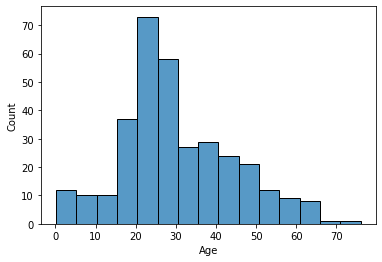

In [7]:
# filling the null values from Age column
sns.histplot(ds['Age'])

In [8]:
ds['Age'].mean()

30.272590361445783

In [11]:
ds['Age'].fillna(ds['Age'].mean(), inplace = True)

In [13]:
ds.dropna(inplace=True)

In [14]:
len(ds)

417

In [ ]:
ds

<AxesSubplot:>

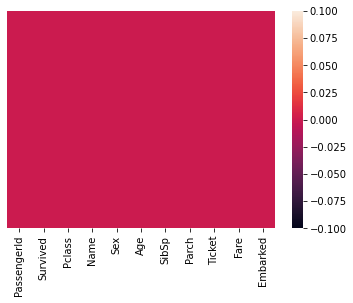

In [16]:
sns.heatmap(ds.isnull(), yticklabels=False)

In [17]:
ds.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
# converting categorical values to numerical values

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
ds['Sex'] = label_encoder.fit_transform(ds['Sex'])

In [22]:
ds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.50000,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.00000,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.00000,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.00000,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",1,30.27259,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.00000,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",1,30.27259,0,0,359309,8.0500,S


In [23]:
ds['Embarked'] = label_encoder.fit_transform(ds['Embarked'])

In [24]:
ds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.50000,0,0,330911,7.8292,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.00000,1,0,363272,7.0000,2
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.00000,0,0,240276,9.6875,1
3,895,0,3,"Wirz, Mr. Albert",1,27.00000,0,0,315154,8.6625,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.00000,1,1,3101298,12.2875,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",1,30.27259,0,0,A.5. 3236,8.0500,2
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.00000,0,0,PC 17758,108.9000,0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,2
416,1308,0,3,"Ware, Mr. Frederick",1,30.27259,0,0,359309,8.0500,2


In [25]:
ds.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,1100.635492,0.364508,2.263789,0.635492,30.200103,0.448441,0.393285,35.627188,1.400480
std,120.923774,0.481870,0.842077,0.481870,12.562386,0.897568,0.982419,55.907576,0.855019
min,892.000000,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.000000,0.000000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,1.000000
50%,1101.000000,0.000000,3.000000,1.000000,30.272590,0.000000,0.000000,14.454200,2.000000
75%,1205.000000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.500000,2.000000
max,1309.000000,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


In [26]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    int32  
 5   Age          417 non-null    float64
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     417 non-null    int32  
dtypes: float64(2), int32(2), int64(5), object(2)
memory usage: 35.8+ KB


In [27]:
# remiving the columns which will not been used

ds.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace=True)

In [28]:
ds

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.50000,0,0,7.8292,1
1,1,3,0,47.00000,1,0,7.0000,2
2,0,2,1,62.00000,0,0,9.6875,1
3,0,3,1,27.00000,0,0,8.6625,2
4,1,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,0,3,1,30.27259,0,0,8.0500,2
414,1,1,0,39.00000,0,0,108.9000,0
415,0,3,1,38.50000,0,0,7.2500,2
416,0,3,1,30.27259,0,0,8.0500,2


## Preparing data to feed into model

In [29]:
X = ds.iloc[:, 1:]
y = ds['Survived']

In [30]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,1
1,3,0,47.00000,1,0,7.0000,2
2,2,1,62.00000,0,0,9.6875,1
3,3,1,27.00000,0,0,8.6625,2
4,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2
414,1,0,39.00000,0,0,108.9000,0
415,3,1,38.50000,0,0,7.2500,2
416,3,1,30.27259,0,0,8.0500,2


In [31]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 417, dtype: int64

In [32]:
# spliting the data into train and test

from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [34]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
325,3,1,23.00000,0,0,7.0500,2
155,3,1,24.00000,0,0,7.5500,2
26,1,0,22.00000,0,1,61.9792,0
279,2,1,22.00000,0,0,10.5000,2
367,3,0,22.00000,0,0,39.6875,2
...,...,...,...,...,...,...,...
1,3,0,47.00000,1,0,7.0000,2
196,1,1,6.00000,0,2,134.5000,0
216,3,0,30.27259,0,0,7.8792,1
244,3,1,30.27259,1,2,23.4500,2


In [35]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
43,2,0,30.0,0,0,13.0000,2
228,3,1,40.5,0,0,15.1000,2
398,3,1,22.0,0,0,7.7750,2
315,3,0,17.0,0,0,7.7333,1
157,3,0,23.0,0,0,7.8542,2
...,...,...,...,...,...,...,...
383,3,0,19.0,1,0,16.1000,2
44,1,0,45.0,1,0,52.5542,2
260,3,1,36.5,1,0,17.4000,2
415,3,1,38.5,0,0,7.2500,2


In [36]:
y_test

43     1
228    0
398    0
315    1
157    1
      ..
383    1
44     1
260    0
415    0
272    1
Name: Survived, Length: 126, dtype: int64

## Building a model

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model = LogisticRegression()

In [39]:
model.fit(x_train, y_train)

LogisticRegression()

In [40]:
predictions = model.predict(x_test)

In [44]:
y_test.values

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [43]:
predictions

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

### Calculating accuracy of model

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        43

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [69]:
print('Confusion matrix :')
print(confusion_matrix(y_test, predictions))

Confusion matrix :
[[83  0]
 [ 0 43]]


In [68]:
print('Accuracy of model :',model.score(x_train, y_train)*100)

Accuracy of model : 100.0


### Making predictions from the model

In [65]:
model.predict(np.array([3, 0, 47, 1, 0, 7, 2]).reshape(1, -1))

array([1], dtype=int64)

In [66]:
model.predict(np.array([3, 1, 30, 0, 0, 2, 1]).reshape(1, -1))

array([0], dtype=int64)